In [108]:
import os
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pickle

In [109]:
# # Set the path to the input folder containing the IMU data files
# #input the data folder
# input_folder = '/Users/patrickmazza/Desktop/ECE5242Proj2_train_additional'

# # Set the path to the output folder for the discretized data files
# #make an output file for it
# output_folder = '/Users/patrickmazza/Desktop/h'

# # Define the number of clusters for k-means clustering
# num_clusters = 75

# # Loop through each text file in the input folder
# for filename in os.listdir(input_folder):
#     if filename.endswith('.txt'):
#         # Load the raw sensor IMU data from the text file
#         data = np.loadtxt(os.path.join(input_folder, filename))

#         # Fit k-means clustering model to the data
#         kmeans = KMeans(n_clusters=num_clusters).fit(data)

#         # Get the cluster assignments for each data point
#         labels = kmeans.labels_

#         # Save the discretized data to a new text file in the output folder
#         output_filename = os.path.join(output_folder, f'{filename[:-4]}_discretized.txt')
#         np.savetxt(output_filename, labels, fmt='%d')
        
#         # Load the discretized data from the output file
#         discretized_data = np.loadtxt(output_filename)

#         # Plot the data as a line graph
#         plt.plot(discretized_data)
#         plt.xlabel('Sample Number')
#         plt.ylabel('Cluster Label')
#         plt.title(f'Discretized IMU Data ({filename})')
#         plt.show()


In [110]:
#  with open('k_means_trained', 'wb') as f:
#             pickle.dump(kmeans, f)

#         output_folder = '/Users/patrickmazza/Downloads/ECE5242Proj2-test'
#         # Get the cluster assignments for each data point
#         labels = kmeans.labels_

#         # Save the discretized data to a new text file in the output folder
#         output_filename = os.path.join(output_folder, f'{filename[:-4]}_discretized.txt')
#         np.savetxt(output_filename, labels, fmt='%d')
        
#         # Load the discretized data from the output file
#         discretized_data = np.loadtxt(output_filename)

In [111]:
# with open('k_means_trained', 'rb') as f:
#     kmeans = pickle.load(f)
    

In [112]:
import os
import pickle
import numpy as np

# Load the trained k-means model from the pickle file
with open('k_means_trained.pkl', 'rb') as f:
    kmeans = pickle.load(f)

# Set the path to the input folder
input_folder = '/Users/patrickmazza/Downloads/ECE5242Proj2-test'

# Loop over all files in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith('.txt'):
        # Load the data from the input file
        data = np.loadtxt(os.path.join(input_folder, filename))

        # Apply the trained k-means model to the data
        labels = kmeans.predict(data[:,1:])

        # Save the discretized data to a new text file in the output folder
        output_folder = '/Users/patrickmazza/Downloads/testdis'
        output_filename = os.path.join(output_folder, f'{filename[:-4]}_discretized.txt')
        np.savetxt(output_filename, labels, fmt='%d')

        # Load the discretized data from the output file
        discretized_data = np.loadtxt(output_filename)


In [113]:
# # Load the trained k-means model from the pickle file
# with open('k_means_trained', 'rb') as f:
#     kmeans = pickle.load(f)

# # Set the path to the input folder
# input_folder = '/Users/patrickmazza/Downloads/ECE5242Proj2-test'

# # Loop over all files in the input folder
# for filename in os.listdir(input_folder):
#     if filename.endswith('.txt'):
#         # Load the data from the input file
#         data = np.loadtxt(os.path.join(input_folder, filename))

#         # Apply the trained k-means model to the data
#         labels = kmeans.predict(data)

#         # Save the discretized data to a new text file in the output folder
#         output_folder = '/Users/patrickmazza/Downloads/testdis'
#         output_filename = os.path.join(output_folder, f'{filename[:-4]}_discretized.txt')
#         np.savetxt(output_filename, labels, fmt='%d')

#         # Load the discretized data from the output file
#         discretized_data = np.loadtxt(output_filename)


In [161]:
import numpy as np

class HMM:
    def __init__(self, n_states, n_observations, max_iterations=100):
        self.n_states = n_states
        self.n_observations = n_observations
        self.max_iterations = max_iterations
        # Define initial state and observation probabilities, and state transition and observation matrices
        self.pi = np.random.rand(n_states)
        self.A = np.random.rand(n_states,n_states)
        self.A /= np.sum(self.A, axis=1).reshape(-1, 1)
#       self.A = np.random.rand(n_states,n_observations)
        self.B = np.random.rand(n_states,n_observations)
        self.B /= np.sum(self.B, axis=1).reshape(-1, 1)
    
    def forward(self, obs):
        c = np.zeros((len(obs)))
        # Initialize alpha
        alpha = np.zeros((self.n_states, len(obs)))
                          
                          

        # Set initial probabilities
        alpha[:, 0] = self.pi * self.B[:,obs[0]]
        c[0]= 1/np.sum(alpha[:,0])
        alpha[:,0] *= c[0]

        # Recursion
        for t in range(1, len(obs)):
            alpha[:, t] = self.B[:, obs[t]] * np.sum(alpha[:, t - 1][:,None]* self.A,axis =0)
            c[t]= 1/np.sum(alpha[:,t])
            alpha[:,t] *= c[t]
            
            
        # For loop through t
            # For loop through j 
                # For loop through i 
        

        return alpha, c
    
    
    def backward(self, obs, c):
        T = len(obs)
        beta = np.zeros((self.n_states,T))
        beta[-1] = 1.0 * c[-1]
        

        for t in reversed(range(T - 1)):
            for i in range(self.n_states):
                beta[i,t] = np.sum(self.A[i,:] * self.B[:, obs[t+1]] * beta[:,t+1])
                beta[i,t] *= c[t]

            # scale beta to avoid underflow
            # beta[:,t] /= np.sum(beta[:,t])

        return beta

    def E_step(self, obs, alpha, beta, c):
        xi = np.zeros((self.n_states, self.n_states, len(obs)-1))
        
        for t in range(len(obs)-1):
            for i in range(self.n_states):
                for j in range(self.n_states):
                    xi[i, j, t] = alpha[i, t] * self.A[i, j] * self.B[j, obs[t+1]] * beta[j, t+1]
            
        gamma = np.zeros((self.n_states,len(obs)))
                     
        for t in range(len(obs)):
            for i in range(self.n_states):
                gamma[i,t] = alpha[i,t] * beta[i,t] / c[t]

        return xi, gamma

    
    
    
    def M_step(self, obs, xi, gamma):
        self.pi = gamma[:, 0]
        self.A = np.sum(xi, axis=2) / np.sum(gamma[:,:-1], axis=1)[:, np.newaxis]

        self.B = np.zeros((self.n_states, self.n_observations))
        for k in range(self.n_observations):
            mask = obs == k
            self.B[:, k] = np.sum(gamma[:, mask], axis=1)
            self.B[:, k] = self.B[:,k] / np.sum(gamma, axis=1)
    
            
    def fit(self, obs, max_iterations=100):
        self.loglik = []
        for iteration in range(max_iterations):
            alpha, c = self.forward(obs)
            beta = self.backward(obs, c)
            xi, gamma = self.E_step(obs, alpha, beta, c)
            self.M_step(obs, xi, gamma)
            self.loglik.append(-np.sum(np.log(c)))
    
    def predict(self, obs):
        self.pi = np.zeros(self.n_states)
        self.pi[0] =1
        alpha ,c = self.forward(obs)
        return -np.sum(np.log(c))

            



In [162]:
#Load the saved numpy txt files
model1 = pickle.load(open("trained_hmm_circle.pkl", 'rb'))
model2 = pickle.load(open("trained_hmm_wave.pkl", 'rb'))
model3 = pickle.load(open("trained_hmm_infinity.pkl", 'rb'))
model4 = pickle.load(open("trained_hmm_beat4.pkl", 'rb'))
model5 = pickle.load(open("trained_hmm_eight_hmm.pkl", 'rb'))
model6 = pickle.load(open("trained_hmm_beat3.pkl", 'rb'))

In [171]:
#Load in gesture to get prediction
folder_path = "/Users/patrickmazza/Desktop/testy"

discretized_values_test = []

# Loop through all files in the folder
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    print(file_path)
    
    # Load data from the file
    data = np.loadtxt(file_path)
    
    # Extract discretized values
    discretized_values_test.append(data.astype(int))
    


/Users/patrickmazza/Desktop/testy/test6_discretized.txt
/Users/patrickmazza/Desktop/testy/test1_discretized.txt
/Users/patrickmazza/Desktop/testy/test8_discretized.txt
/Users/patrickmazza/Desktop/testy/test7_discretized.txt
/Users/patrickmazza/Desktop/testy/test2_discretized.txt
/Users/patrickmazza/Desktop/testy/test5_discretized.txt
/Users/patrickmazza/Desktop/testy/test4_discretized.txt
/Users/patrickmazza/Desktop/testy/test3_discretized.txt


Circle Prediction
nan
Wave Prediction
nan
Infinity Prediction
-2021.7074448560857
Beat4 Prediction
nan
Eight Prediction
nan
Beat3 Prediction
nan


/var/folders/pg/_t12fljx1_7g3b8l3n_zm5480000gn/T/ipykernel_21989/1244397281.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  c[0]= 1/np.sum(alpha[:,0])
/var/folders/pg/_t12fljx1_7g3b8l3n_zm5480000gn/T/ipykernel_21989/1244397281.py:27: RuntimeWarning: invalid value encountered in multiply
  alpha[:,0] *= c[0]
/var/folders/pg/_t12fljx1_7g3b8l3n_zm5480000gn/T/ipykernel_21989/1244397281.py:32: RuntimeWarning: divide by zero encountered in double_scalars
  c[t]= 1/np.sum(alpha[:,t])
/var/folders/pg/_t12fljx1_7g3b8l3n_zm5480000gn/T/ipykernel_21989/1244397281.py:33: RuntimeWarning: invalid value encountered in multiply
  alpha[:,t] *= c[t]


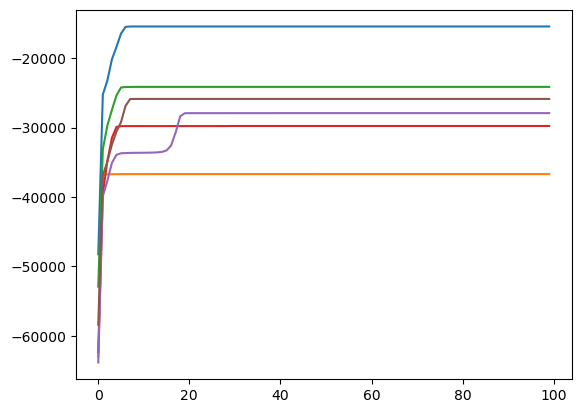

In [198]:
#****************
#Number closest to zero is the Gesture that has been predicted, this is the only nan. The i variable can be changed to view each gesture projection
#****************


import matplotlib.pyplot as plt
plt.plot(model1.loglik)
plt.plot(model2.loglik)
plt.plot(model3.loglik)
plt.plot(model4.loglik)
plt.plot(model5.loglik)
plt.plot(model6.loglik)
plt.show

i =7
print("Circle Prediction")
print(model1.predict(discretized_values_test[i]))
print("Wave Prediction")
print(model2.predict(discretized_values_test[i]))
print("Infinity Prediction")
print(model3.predict(discretized_values_test[i]))
print("Beat4 Prediction")
print(model4.predict(discretized_values_test[i]))
print("Eight Prediction")
print(model5.predict(discretized_values_test[i]))
print("Beat3 Prediction")
print(model6.predict(discretized_values_test[i]))

In [199]:
len(discretized_values_test[0])

878